In [142]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as  plt

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()

print(type(iris))


<class 'sklearn.utils.Bunch'>


In [144]:
# Now, convert a sklearn dataset to a Pandas dataset
df=pd.DataFrame(iris['data'])

df.head()

# df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
# np.c_ is the numpy concatenate function, which is used to concat iris['data'] and iris['target']


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
distortions = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    print(f"The inertia for {k} cluster(s) is {kmeans.inertia_}:")
# The k-means algorithm tries to minimize distortion, 
# which is defined as the sum of the squared distances between each observation vector 
# and its dominating centroid. (wcss)

The inertia for 1 cluster(s) is 681.3706:
The inertia for 2 cluster(s) is 152.34795176035792:
The inertia for 3 cluster(s) is 78.85144142614601:
The inertia for 4 cluster(s) is 57.25600931571815:
The inertia for 5 cluster(s) is 46.44618205128205:
The inertia for 6 cluster(s) is 39.066035353535355:
The inertia for 7 cluster(s) is 34.299712121212124:
The inertia for 8 cluster(s) is 30.064593073593077:
The inertia for 9 cluster(s) is 27.90953699466057:


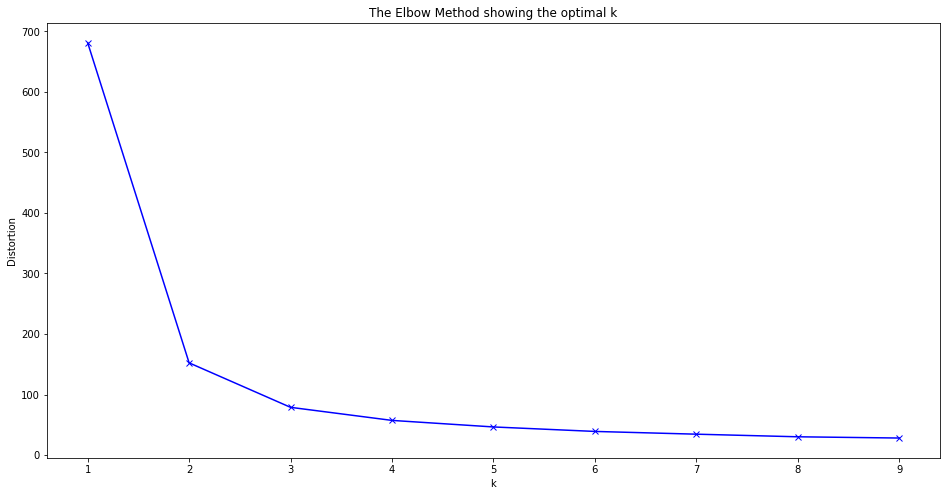

In [147]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [149]:
# from the figure above, we can obserce that 3 clusters seem to be optimal.
# Now we can let n_clusters = 3

In [185]:
x = df.iloc[:,[0,1,2,3]].values


kmeans_new = KMeans(n_clusters = 3)
kmeans_new.fit(df)
y_kmeans_new = kmeans_new.predict(df) # notice: it is .predict()

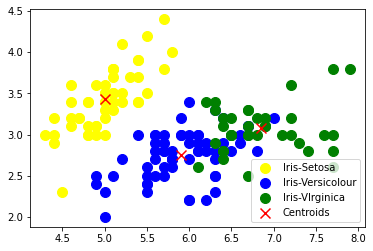

In [191]:
plt.scatter(x[y_kmeans_new == 0, 0],x[y_kmeans_new==0,1],s=100,c='yellow',label='Iris-Setosa')
plt.scatter(x[y_kmeans_new == 1, 0],x[y_kmeans_new==1,1],s=100,c='blue',label='Iris-Versicolour')
plt.scatter(x[y_kmeans_new == 2, 0],x[y_kmeans_new==2,1],s=100,c='green',label='Iris-VIrginica')

# centers = kmeans_new.cluster_centers_

plt.scatter(kmeans_new.cluster_centers_[:,0],kmeans_new.cluster_centers_[:,1],
            s = 100, marker='x',c ='red',
            label='Centroids')

plt.legend()